* Problem with not initializing the weights correctly.
* How to fix this problem.
* Different initialization methods in Pytorch.
    1. The Default Method in pytorch
    2. The Xavier  Method
    3. The He Method


## What happen when Weights in same layer has the same values

many times when the neural network is not functioning correctly, it has to do with the fact that the weights were not initialized correctly during the training phase of the neural network.

if we put the same values in the parameters of the same layer, then after the traning, the weights in the same layer has different but same values.

this is because each neuron in the same layer will have same output and such have the same gradient update.

as a result it is recommended to initalize the weights randomly.

## How weights are randomly initialized

we initialize our parameters by sampling from the uniform distribution, this distribution has a constant probability in a specific range.
![Screenshot%202023-08-22%20173633.png](attachment:Screenshot%202023-08-22%20173633.png)

for example in the case above, any value between -1 to 1 can be sampled with equal probability.
The main problem is how to select the range of the uniform distribution.

Suppose, if uniform distribution has narrow range between -0.05 to -0.05 then the problem is that the values that we sample is squased between -0.05 to 0.05, which is too close together and defeats the idea of randomly sampling the values of the weights.

but, there is also a problem with making the range of our distribution, too wide. then if draw the samples from the tails of the distribution, the values will be large, this can lead to problems.
because, if the values provided to activation functions is too large, then the gradient will vanish.


if the number of neurons in the layer is more and the length of uniform distribution is also large, then the chances of the sampled values being large increases. this cause larger input to the activation function. `so, we have to adjust the width of the distribution according to the number of inputs.`



## How to fix the problem of vanishing gradient due to a large number of neurons.

the idea for the solution is we scale the width of the distribution by the inverse of the number of neurons.




## Different initialization methods in pytorch

1. Default method in pytorch:
![Screenshot%202023-08-22%20175719.png](attachment:Screenshot%202023-08-22%20175719.png)

2. Xavier Method:
- it is used in conjunction with tanh activation.
![Screenshot%202023-08-22%20175951.png](attachment:Screenshot%202023-08-22%20175951.png)

- once, created the nn Linear object, apply the function given below:
  torch.nn.init.xavier_uniform(linear.weight)


3. He Mehtod:
- for ReLu, we use He initialize method
- after creating linear object, we use following method.
  <br>
  torch.nn.init.kaiming_uniform(linear.weight, nonlinearity='relu')

## Test Uniform, Default and Xavier Uniform Initialization on MNIST dataset with tanh activation

In [1]:
# Import the libraries we need to use in this lab

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)


# Define the neural network with Xavier initialization
class Net_Xavier(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x




# Define the neural network with Uniform initialization
class Net_Uniform(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x



# Define the neural network with Default initialization
class Net(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x



# function to Train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss':[], 'validation_accuracy':[]}

    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label==y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)

    return loss_accuracy


# Create the train dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())


# Create the validation dataset
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())


# Create Dataloader for both train dataset and validation dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

# Define criterion function
criterion = nn.CrossEntropyLoss()


# Set the parameters
input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100, output_dim]
epochs = 15



100%|██████████| 9912422/9912422 [00:00<00:00, 400270641.33it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 88162804.82it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 210574289.70it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8960737.90it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
# Train the model with default initialization
model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

In [3]:
# Train the model with Xavier initialization
model_Xavier = Net_Xavier(layers)
optimizer = torch.optim.SGD(model_Xavier.parameters(), lr=learning_rate)
training_results_Xavier = train(model_Xavier, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

In [4]:
# Train the model with Uniform initialization
model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

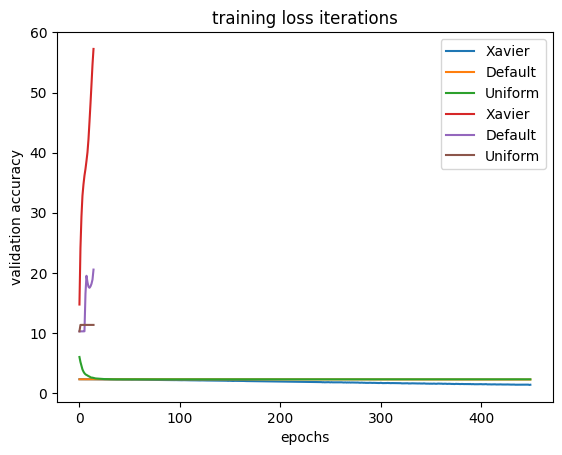

In [5]:
# Plot the loss
plt.plot(training_results_Xavier['training_loss'], label='Xavier')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')
plt.title('training loss iterations')
plt.legend()

# Plot the accuracy
plt.plot(training_results_Xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform')
plt.ylabel('validation accuracy')
plt.xlabel('epochs')
plt.legend()

Test Uniform, Default and He Initialization on MNIST Dataset with Relu Activation

In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

# Define the class for neural network model with He Initialization
class Net_He(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_He, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x


# Define the class for neural network model with Uniform Initialization
class Net_Uniform(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size,output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)

        return x


# Define the class for neural network model with PyTorch Default Initialization
class Net(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)

    def forward(self, x):
        L=len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)

        return x


# Define function to  train model
def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss': [], 'validation_accuracy': []}

    #n_epochs
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)

    return loss_accuracy



# Create the training dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())


# Create the validation dataset
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())



# Create the data loader for training and validation
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)


# Create the criterion function
criterion = nn.CrossEntropyLoss()


# Create the parameters
input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 200, 100, output_dim]




In [7]:
# Train the model with the default initialization
model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader,validation_loader, optimizer, epochs=30)

KeyboardInterrupt: ignored

In [ ]:
# Train the model with the He initialization
model_He = Net_He(layers)
optimizer = torch.optim.SGD(model_He.parameters(), lr=learning_rate)
training_results_He = train(model_He, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [ ]:
# Train the model with the Uniform initialization
model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=30)


In [ ]:
# Plot the loss
plt.plot(training_results_He['training_loss'], label='He')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')
plt.title('training loss iterations')
plt.legend()

# Plot the accuracy
plt.plot(training_results_He['validation_accuracy'], label='He')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()